In [1]:
from warnings import filterwarnings 
filterwarnings("ignore")

import pandas as pd
from pprint import pprint
import datetime
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy import stats

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#### Read Connecticut houses from the file.
#### Replace null values for the bed, bath, acre_lot, and house_size features with the mode value.
#### Drop all other rows with null values.

In [2]:
ct_realtor_data_df = pd.read_csv('Connecticut-realtor-data.csv')
ct_realtor_data_df.drop(columns=["Unnamed: 0"],inplace=True)


ct_realtor_data_df['bed'].fillna(ct_realtor_data_df['bed'].mode()[0], inplace=True)
ct_realtor_data_df['bath'].fillna(ct_realtor_data_df['bath'].mode()[0], inplace=True)
ct_realtor_data_df['acre_lot'].fillna(ct_realtor_data_df['acre_lot'].mode()[0], inplace=True)
ct_realtor_data_df['house_size'].fillna(ct_realtor_data_df['house_size'].mode()[0], inplace=True)

#ct_realtor_data_df["acre_lot"] = ct_realtor_data_df["acre_lot"].fillna(0)
#ct_realtor_data_df["bed"] = ct_realtor_data_df["bed"].fillna(0)
#ct_realtor_data_df["bath"] = ct_realtor_data_df["bath"].fillna(0)
#ct_realtor_data_df["house_size"] = ct_realtor_data_df["house_size"].fillna(0)

ct_realtor_data_df.dropna(inplace=True)
ct_realtor_data_df.head()

status  bed  bath  acre_lot          city        state  zip_code  \
1  for_sale  4.0   3.0      2.34      Coventry  Connecticut    6238.0   
2  for_sale  1.0   1.0      0.17    Willington  Connecticut    6279.0   
3  for_sale  2.0   1.0      0.91  East Windsor  Connecticut    6016.0   
4  for_sale  2.0   1.0      0.36        Vernon  Connecticut    6066.0   
6  for_sale  4.0   2.0      0.38  East Windsor  Connecticut    6016.0   

   house_size prev_sold_date     price  
1      3320.0     2021-06-01  579900.0  
2       680.0     2019-08-16   65000.0  
3       960.0     2012-06-06  215000.0  
4       860.0     2016-09-02  144900.0  
6      1617.0     1999-09-30  289900.0

#### Group and count the zip_code feature

In [3]:
ct_realtor_data_df.groupby(["zip_code"])["zip_code"].count().sort_values(ascending=False)

zip_code
6880.0    160
6010.0    145
6902.0    130
6606.0    126
6840.0    109
6614.0    101
6790.0     99
6824.0     98
6516.0     96
6877.0     93
6776.0     93
6460.0     92
6830.0     91
6450.0     86
6457.0     86
6360.0     86
6897.0     83
6831.0     82
6811.0     81
6854.0     80
6082.0     79
6514.0     78
6810.0     78
6708.0     76
6770.0     75
6513.0     73
6451.0     72
6488.0     72
6820.0     70
6111.0     69
6704.0     68
6484.0     68
6705.0     67
6851.0     66
6611.0     66
6883.0     64
6320.0     63
6903.0     63
6033.0     62
6492.0     61
6066.0     59
6106.0     59
6040.0     59
6511.0     59
6118.0     58
6074.0     58
6512.0     57
6605.0     56
6610.0     56
6410.0     56
6825.0     55
6002.0     55
6489.0     52
6604.0     52
6109.0     52
6905.0     52
6473.0     51
6468.0     51
6001.0     51
6804.0     51
6801.0     49
6416.0     49
6812.0     49
6405.0     48
6437.0     48
6850.0     48
6053.0     48
6114.0     47
6517.0     47
6340.0     46
6443.0     

#### Create new feature prev_sold_year from prev_sold_date

In [4]:
ct_realtor_data_df["prev_sold_year"] = pd.to_datetime(ct_realtor_data_df["prev_sold_date"], format='%Y-%m-%d').dt.year
ct_realtor_data_df["prev_sold_year"].value_counts()

2021    567
2019    438
2018    413
2020    411
2005    388
2006    377
2017    371
2016    350
2007    338
2004    337
2015    322
2014    280
2003    259
2013    253
2008    243
2009    223
2010    223
2002    223
2012    221
2000    193
2001    188
1999    174
2011    169
1998    168
1997    120
1995    112
1996    108
1994     99
1993     97
1987     90
1991     79
1992     79
1988     77
2022     72
1989     65
1990     63
1984      7
1986      5
1985      5
1978      4
1983      4
1980      3
1976      2
1981      2
1966      2
1974      2
1982      2
1965      2
1973      2
1971      2
1977      2
1967      2
1970      1
1961      1
1968      1
1972      1
1963      1
1979      1
Name: prev_sold_year, dtype: int64

### Select the rows where the year is after 2014, the state is Connecticut, the status is for sale

In [5]:
realtor_data_df = ct_realtor_data_df[(ct_realtor_data_df["prev_sold_year"] > 2014.0) &
                                     (ct_realtor_data_df["state"].isin(["Connecticut"])) &
                                     (ct_realtor_data_df["status"] == "for_sale")
                                    ]
realtor_data_df.drop(columns=["prev_sold_year"],inplace=True)
realtor_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2944 entries, 1 to 13743
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   status          2944 non-null   object 
 1   bed             2944 non-null   float64
 2   bath            2944 non-null   float64
 3   acre_lot        2944 non-null   float64
 4   city            2944 non-null   object 
 5   state           2944 non-null   object 
 6   zip_code        2944 non-null   float64
 7   house_size      2944 non-null   float64
 8   prev_sold_date  2944 non-null   object 
 9   price           2944 non-null   float64
dtypes: float64(6), object(4)
memory usage: 253.0+ KB


#### Draw some graphs the price feature so we can start to look for outliers.

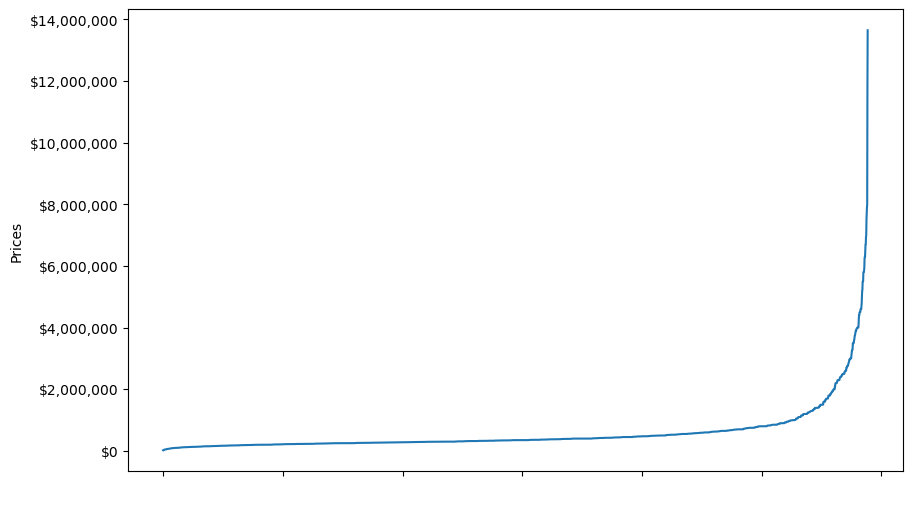

In [6]:
graph_df = realtor_data_df.sort_values(by="price")
graph_df.reset_index(drop=True,inplace=True)
fig, ax = plt.subplots(figsize=(10, 6))

ax.ticklabel_format(style='plain')
ax.yaxis.set_major_formatter('${x:1,.0f}')
ax.xaxis.set_major_formatter(' ')

plt.plot(graph_df.index,graph_df["price"])
plt.xlabel("")
plt.ylabel("Prices")
#plt.legend(loc="best")
plt.show()

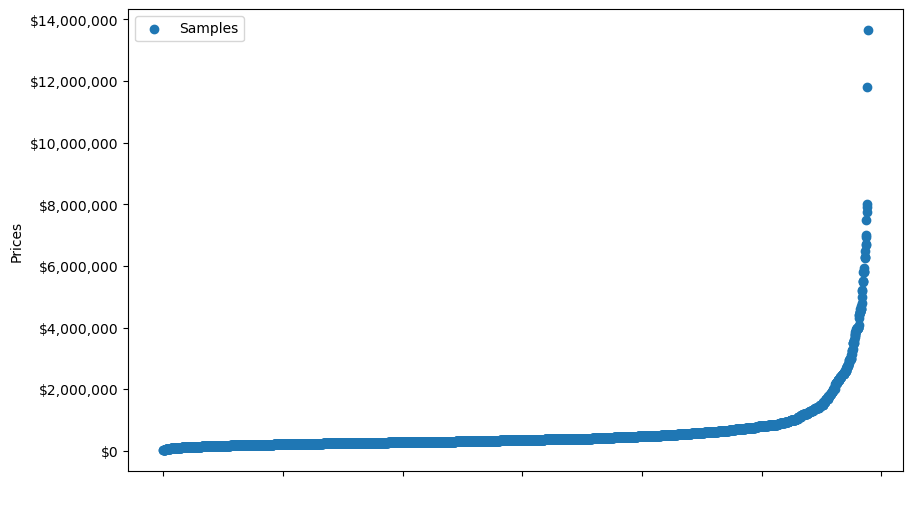

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.ticklabel_format(style='plain')
ax.yaxis.set_major_formatter('${x:1,.0f}')
ax.xaxis.set_major_formatter(' ')

ax.scatter(x=graph_df.index, y=graph_df["price"], label="Samples")
plt.xlabel("")
plt.ylabel("Prices")
plt.legend(loc="best")
plt.show()

(array([1.100e+03, 1.113e+03, 3.270e+02, 1.240e+02, 6.000e+01, 4.400e+01,
        2.900e+01, 1.800e+01, 2.200e+01, 2.000e+01, 1.800e+01, 5.000e+00,
        6.000e+00, 6.000e+00, 1.400e+01, 1.000e+00, 1.000e+01, 2.000e+00,
        1.000e+00, 2.000e+00, 3.000e+00, 5.000e+00, 1.000e+00, 3.000e+00,
        2.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([   19900.,   292502.,   565104.,   837706.,  1110308.,  1382910.,
         1655512.,  1928114.,  2200716.,  2473318.,  2745920.,  3018522.,
         3291124.,  3563726.,  3836328.,  4108930.,  4381532.,  4654134.,
         4926736.,  5199338.,  5471940.,  5744542.,  6017144.,  6289746.,
         6562348.,  6834950.,  7107552.,  7380154.,  7652756.,  7925358.,
      

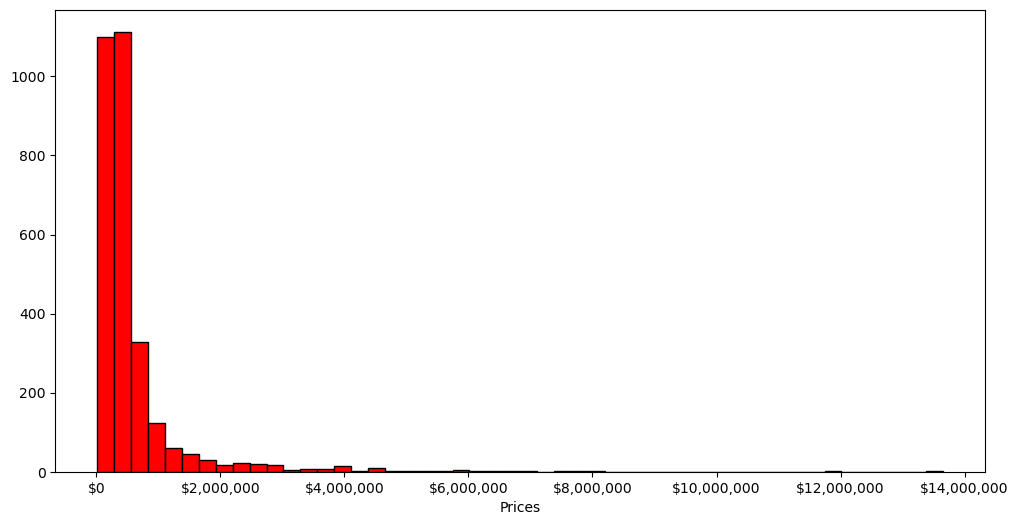

In [8]:
fig, ax = plt.subplots(figsize=(12, 6)) 
ax.ticklabel_format(style='plain')

ax.xaxis.set_major_formatter('${x:1,.0f}')

ax.set_xlabel('Prices')

plt.hist(graph_df["price"], bins=50, color='red', edgecolor='black')

### Try a few different techniques to find the price outliers.

#### First we can try calculating whiskers.

In [9]:
Q1 = realtor_data_df["price"].quantile(0.25)
print("Q1 = ${:,.0f}".format(Q1))

Q1 = $249,900


In [10]:
Q3 = realtor_data_df["price"].quantile(0.75)
print("Q3 = ${:,.0f}".format(Q3))

Q3 = $565,000


In [11]:
IQR = Q3 - Q1
print("IQR = ${:,.0f}".format(IQR))

IQR = $315,100


In [12]:
upper_whisker = Q3 + (1.5 * IQR)
print("Upper Whisker = ${:,.0f}".format(upper_whisker))

Upper Whisker = $1,037,650


In [13]:
lower_whisker = Q1 - (1.5 * IQR)
print("Lower Whisker = ${:,.0f}".format(lower_whisker))

Lower Whisker = $-222,750


#### Draw a boxplot with the values and use the whiskers as tick marks.

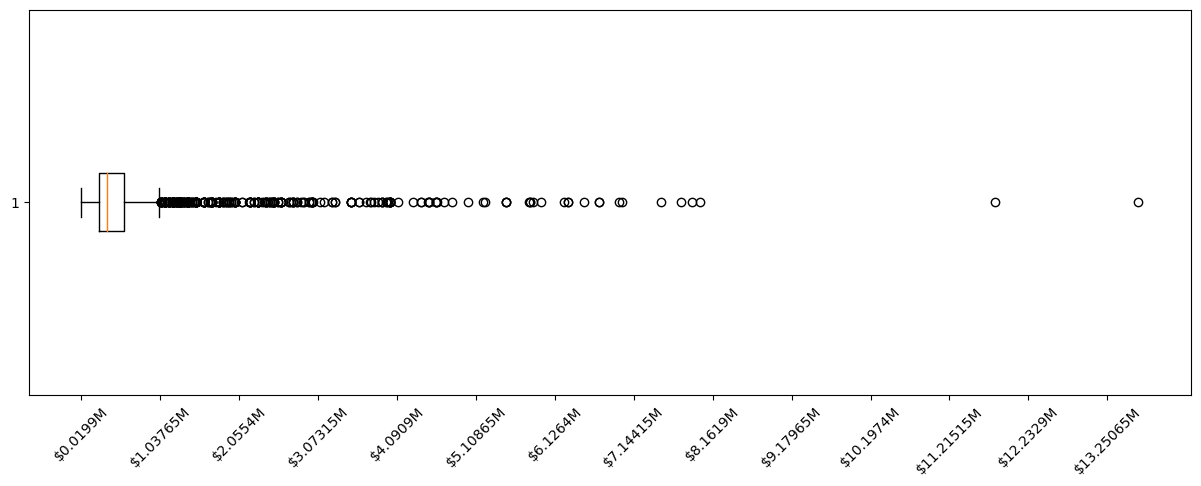

In [14]:
def format_fn(tick_val, tick_pos):
    what = tick_val/1000000
    rtnval = "$" + str(what) + "M"
    if (what==0):
        rtnval = "$0"
    return rtnval

start = min(realtor_data_df.price)
end =  max(realtor_data_df.price)

tick_step = upper_whisker - start

fig, ax = plt.subplots(figsize=(15, 5))

ax.ticklabel_format(style='plain')
ax.xaxis.set_major_formatter(format_fn)
ax.xaxis.set_ticks(np.arange(start, end, tick_step))
ax.yaxis.set_major_formatter(' ')

bp = plt.boxplot(realtor_data_df.price, vert=False)
plt.xticks(rotation=45)
plt.show()

In [15]:
box_plot_dict = {}
box_plot_dict['lower_whisker'] = bp['whiskers'][0].get_xdata()[1]
box_plot_dict['lower_quartile'] = bp['boxes'][0].get_xdata()[1]
box_plot_dict['median'] = bp['medians'][0].get_xdata()[1]
box_plot_dict['upper_quartile'] = bp['boxes'][0].get_xdata()[2]
box_plot_dict['upper_whisker'] = bp['whiskers'][(0)+1].get_xdata()[1]


print("${:,.0f}".format(box_plot_dict['lower_whisker']))
print("${:,.0f}".format(box_plot_dict['upper_whisker']))

$19,900
$1,025,000


##### Count the number of outliers found.

In [16]:
realtor_data_df[realtor_data_df["price"] > box_plot_dict['upper_whisker']]["price"].count()

300

#### Draw a Seaborn Box Plot with the data to see what it says are the whiskers and outliers.

In [17]:
df = px.data.tips()
fig = px.box(realtor_data_df, x="price", points="all")
fig.show()

#### Next lets use Z Score to find outlier in the price feature

In [18]:
realtor_data_df['z_price'] = stats.zscore(realtor_data_df['price'])

In [19]:
realtor_data_df.head()

status  bed  bath  acre_lot           city        state  zip_code  \
1   for_sale  4.0   3.0      2.34       Coventry  Connecticut    6238.0   
2   for_sale  1.0   1.0      0.17     Willington  Connecticut    6279.0   
4   for_sale  2.0   1.0      0.36         Vernon  Connecticut    6066.0   
8   for_sale  2.0   2.0      0.17  South Windsor  Connecticut    6074.0   
11  for_sale  3.0   2.0      0.87         Vernon  Connecticut    6066.0   

    house_size prev_sold_date     price   z_price  
1       3320.0     2021-06-01  579900.0 -0.012826  
2        680.0     2019-08-16   65000.0 -0.610503  
4        860.0     2016-09-02  144900.0 -0.517758  
8       1168.0     2020-12-28  172500.0 -0.485721  
11      1850.0     2015-11-09  299900.0 -0.337840

##### Z Score > 3 is standard for excluding rows

In [20]:
price_outliers_list = list(np.where(np.abs(realtor_data_df['z_price']) > 3)[0])

##### List the indexes of the outliers found by Z Score

In [21]:
print("Price Outliers: ", price_outliers_list)
print("Total Outlier Price: ", len(price_outliers_list), "\n")
price_outliers_list_set = list(set(price_outliers_list))

Price Outliers:  [547, 921, 1345, 2236, 2377, 2437, 2457, 2458, 2504, 2505, 2516, 2518, 2519, 2520, 2536, 2562, 2565, 2566, 2586, 2592, 2594, 2598, 2604, 2608, 2613, 2616, 2635, 2636, 2652, 2655, 2656, 2657, 2660, 2661, 2662, 2663, 2672, 2673, 2677, 2680, 2683, 2684, 2690, 2691, 2693, 2706, 2724, 2725, 2733, 2734, 2746, 2749, 2750, 2775, 2811, 2830, 2837, 2838, 2839, 2848, 2874, 2875, 2909, 2916, 2917, 2919, 2938]
Total Outlier Price:  67 



In [22]:
realtor_data_df.iloc[price_outliers_list_set, :].sort_values("price",ascending=False)

status   bed  bath  acre_lot           city        state  zip_code  \
12181  for_sale   7.0  10.0      2.53      Greenwich  Connecticut    6830.0   
13643  for_sale  14.0  17.0      4.18      Greenwich  Connecticut    6831.0   
12216  for_sale   6.0   8.0      2.61      Greenwich  Connecticut    6830.0   
11792  for_sale   6.0   8.0      1.12      Greenwich  Connecticut    6830.0   
12475  for_sale   6.0   9.0      2.00       Westport  Connecticut    6880.0   
11724  for_sale   4.0   6.0      1.60      Fairfield  Connecticut    6824.0   
13264  for_sale   5.0   6.0      4.00      Greenwich  Connecticut    6831.0   
12092  for_sale   4.0   5.0      0.61       Westport  Connecticut    6880.0   
12490  for_sale   7.0  10.0      2.07       Westport  Connecticut    6880.0   
12868  for_sale   8.0  11.0      7.25     New Canaan  Connecticut    6840.0   
11793  for_sale   6.0   8.0      0.69      Greenwich  Connecticut    6830.0   
13716  for_sale   6.0   8.0      1.65       Westport  Connecticut    6880.0   
12671  for_sale   6.0   8.0      3.58       Westport  Connecticut    6880.0   
11519  for_sale   5.0   6.0      2.00         Darien  Connecticut    6820.0   
12106  for_sale   4.0   5.0      0.11       Westport  Connecticut    6880.0   
11784  for_sale   5.0   9.0      2.01      Greenwich  Connecticut    6830.0   
13645  for_sale   6.0   9.0      1.00      Greenwich  Connecticut    6830.0   
11787  for_sale   6.0   9.0      1.00      Greenwich  Connecticut    6830.0   
12960  for_sale   5.0   7.0      2.36     New Canaan  Connecticut    6840.0   
13246  for_sale   6.0   8.0      2.80      Greenwich  Connecticut    6831.0   
12512  for_sale   6.0   7.0      0.52       Westport  Connecticut    6880.0   
12342  for_sale   6.0   8.0      2.04     New Canaan  Connecticut    6840.0   
12827  for_sale   3.0   2.0     10.96      Greenwich  Connecticut    6831.0   
3956   for_sale   4.0   6.0      0.19     Stonington  Connecticut    6378.0   
12590  for_sale   6.0   8.0      1.00       Westport  Connecticut    6880.0   
12822  for_sale   6.0  10.0      4.34      Greenwich  Connecticut    6831.0   
12558  for_sale   6.0   9.0      0.89       Westport  Connecticut    6880.0   
12556  for_sale   6.0   8.0      2.11       Westport  Connecticut    6880.0   
13653  for_sale   4.0   5.0      0.14      Greenwich  Connecticut    6830.0   
13613  for_sale   6.0   7.0      2.00     New Canaan  Connecticut    6840.0   
12653  for_sale   6.0   7.0      2.00     New Canaan  Connecticut    6840.0   
11726  for_sale   6.0   4.0      0.26      Fairfield  Connecticut    6824.0   
2395   for_sale   4.0   7.0      0.68         Morris  Connecticut    6763.0   
13126  for_sale   6.0   8.0      3.01         Wilton  Connecticut    6897.0   
12881  for_sale   5.0   6.0      2.58     New Canaan  Connecticut    6840.0   
12049  for_sale   6.0   3.0      1.03  Old Greenwich  Connecticut    6870.0   
12489  for_sale   7.0  10.0      1.00       Westport  Connecticut    6880.0   
12483  for_sale   6.0   7.0      1.87       Westport  Connecticut    6880.0   
12078  for_sale   6.0   6.0      0.28      Riverside  Connecticut    6878.0   
12514  for_sale   5.0   6.0      0.42       Westport  Connecticut    6880.0   
12513  for_sale   5.0   5.0      0.27       Westport  Connecticut    6880.0   
12718  for_sale   3.0   2.0      4.10     Ridgefield  Connecticut    6877.0   
12783  for_sale   5.0   7.0      0.71       Westport  Connecticut    6880.0   
11448  for_sale   6.0   7.0      1.04      Greenwich  Connecticut    6807.0   
12880  for_sale   5.0   5.0      2.31     New Canaan  Connecticut    6840.0   
13216  for_sale   6.0   9.0      5.32     New Canaan  Connecticut    6840.0   
11954  for_sale   5.0   4.0      0.16        Norwalk  Connecticut    6853.0   
13273  for_sale   5.0   5.0      2.50      Greenwich  Connecticut    6831.0   
13347  for_sale   6.0   6.0      1.07       Stamford  Connecticut    6902.0   
12317  for_sale   6.0   8.0      4.05     New Canaan  Conne

#### Draw a line graph with the data excluding outliers indentified by the whiskers.

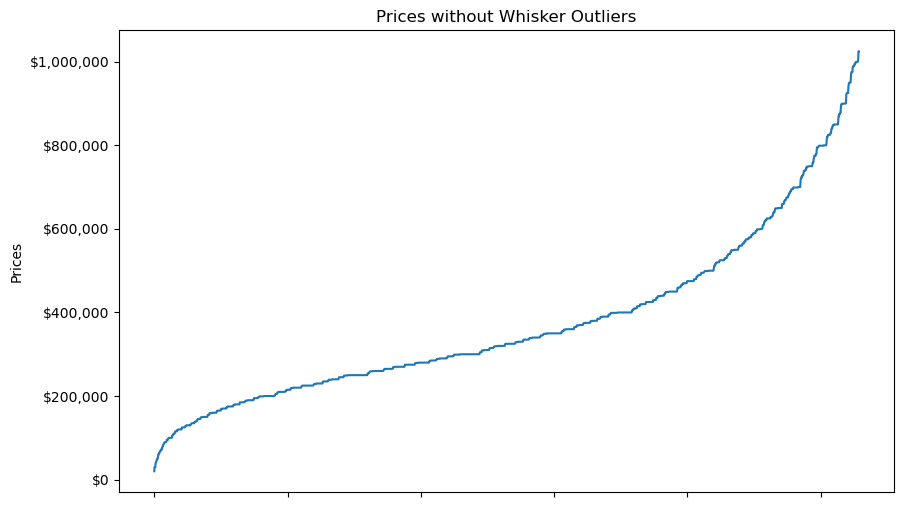

In [23]:
graph_df = realtor_data_df[realtor_data_df["price"] <= upper_whisker].sort_values(by="price")
graph_df.reset_index(drop=True,inplace=True)
fig, ax = plt.subplots(figsize=(10, 6))

ax.ticklabel_format(style='plain')
ax.yaxis.set_major_formatter('${x:1,.0f}')
ax.xaxis.set_major_formatter(' ')

plt.plot(graph_df.index,graph_df["price"])
plt.title("Prices without Whisker Outliers")
plt.xlabel("")
plt.ylabel("Prices")
plt.show()

#### Draw a line graph with the data excluding outliers indentified by the Z Score.

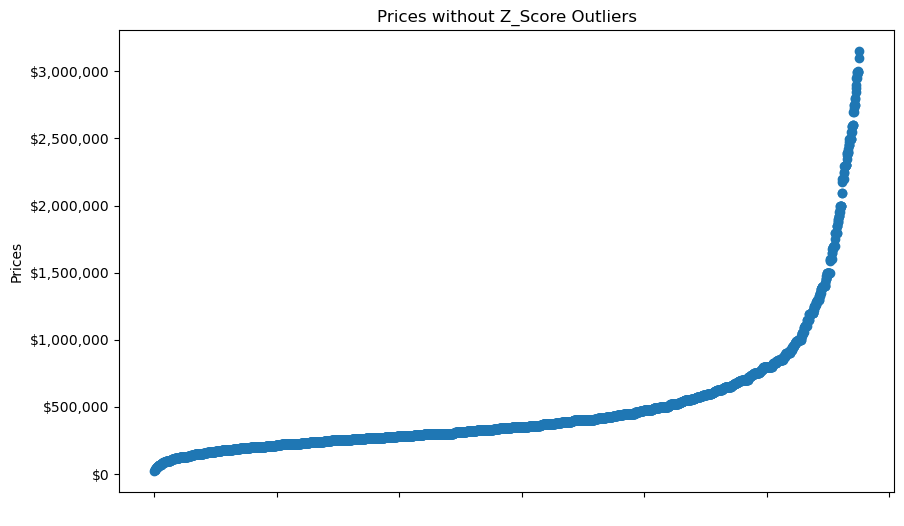

In [24]:
graph_df = realtor_data_df.drop(realtor_data_df.index[price_outliers_list_set]).sort_values(by="price")
graph_df.reset_index(drop=True,inplace=True)
fig, ax = plt.subplots(figsize=(10, 6))

ax.ticklabel_format(style='plain')
ax.yaxis.set_major_formatter('${x:1,.0f}')
ax.xaxis.set_major_formatter(' ')

ax.scatter(x=graph_df.index, y=graph_df["price"], label="Samples")
#plt.plot(graph_df.index,graph_df["price"])
plt.title("Prices without Z_Score Outliers")
plt.xlabel("")
plt.ylabel("Prices")
plt.show()

### Use Z Score to eliminate outliers found in other features
#### The order in which the outliers are identified and removed is critical here.

In [25]:
realtor_data_df.drop(realtor_data_df.index[price_outliers_list], inplace=True)

realtor_data_df['z_bed'] = stats.zscore(realtor_data_df['bed'])
bed_outliers_list = list(np.where(np.abs(realtor_data_df['z_bed']) > 3)[0])
realtor_data_df.drop(realtor_data_df.index[bed_outliers_list], inplace=True)

realtor_data_df['z_bath'] = stats.zscore(realtor_data_df['bath'])
bath_outliers_list = list(np.where(np.abs(realtor_data_df['z_bath']) > 3)[0])
realtor_data_df.drop(realtor_data_df.index[bath_outliers_list], inplace=True)

realtor_data_df['z_acre_lot'] = stats.zscore(realtor_data_df['acre_lot'])
acre_lot_outliers_list = list(np.where(np.abs(realtor_data_df['z_acre_lot']) > 3)[0])
realtor_data_df.drop(realtor_data_df.index[acre_lot_outliers_list], inplace=True)

realtor_data_df['z_house_size'] = stats.zscore(realtor_data_df['house_size'])
house_size_outliers_list = list(np.where(np.abs(realtor_data_df['z_house_size']) > 3)[0])
realtor_data_df.drop(realtor_data_df.index[house_size_outliers_list], inplace=True)

realtor_data_df.head()

status  bed  bath  acre_lot           city        state  zip_code  \
1   for_sale  4.0   3.0      2.34       Coventry  Connecticut    6238.0   
2   for_sale  1.0   1.0      0.17     Willington  Connecticut    6279.0   
4   for_sale  2.0   1.0      0.36         Vernon  Connecticut    6066.0   
8   for_sale  2.0   2.0      0.17  South Windsor  Connecticut    6074.0   
11  for_sale  3.0   2.0      0.87         Vernon  Connecticut    6066.0   

    house_size prev_sold_date     price   z_price     z_bed    z_bath  \
1       3320.0     2021-06-01  579900.0 -0.012826  0.457400  0.489523   
2        680.0     2019-08-16   65000.0 -0.610503 -1.730969 -1.343100   
4        860.0     2016-09-02  144900.0 -0.517758 -1.001512 -1.343100   
8       1168.0     2020-12-28  172500.0 -0.485721 -1.001512 -0.426788   
11      1850.0     2015-11-09  299900.0 -0.337840 -0.272056 -0.426788   

    z_acre_lot  z_house_size  
1     0.412196      1.718785  
2    -0.235344     -1.287052  
4    -0.178647     -1.082108  
8    -0.235344     -0.731427  
11   -0.026460      0.045081

##### Drop the columns that were created when we calculated Z Score for each feature.

In [26]:
realtor_data_df.drop(columns=['z_price','z_bed','z_bath','z_acre_lot','z_house_size',"status","city","state"],inplace=True)

#### Draw a Hear Map for the features we will work with for the rest of Connecticut analysis.

Text(0.5, 1.0, 'Correlation Between Variables')

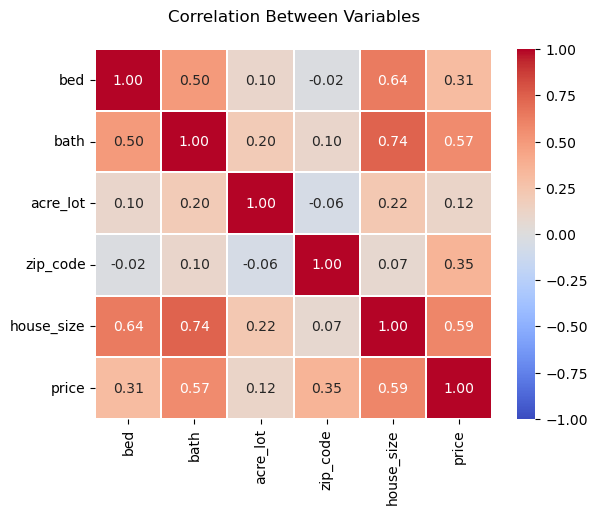

In [27]:
sns.heatmap(realtor_data_df.corr(), vmin=-1, vmax=1, cmap = 'coolwarm', annot=True, fmt='.2f', linewidths=0.1)
plt.title("Correlation Between Variables", pad=20)

#### Draw a Pair Plot diagram for the features we will work with for the rest of Connecticut analysis.

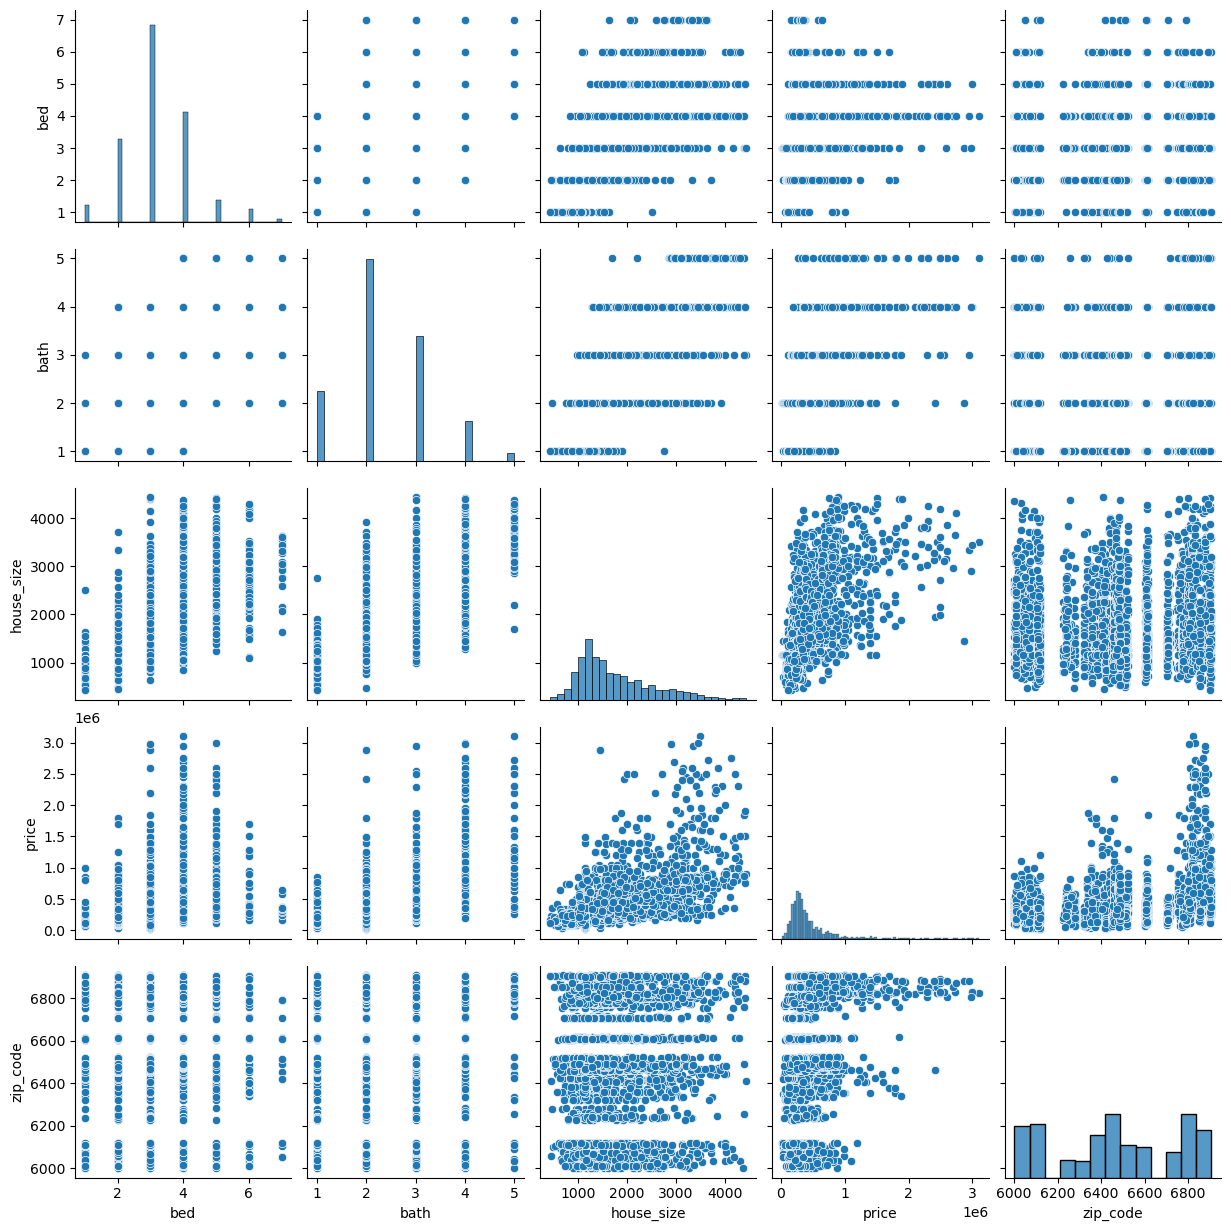

In [28]:
sns.pairplot(realtor_data_df[["bed","bath","house_size","price","zip_code"]])

#### List the features and their characteristics.

In [29]:
for col in realtor_data_df.columns.tolist():
    pprint(f"++++++++++++++++++ {col} ++++++++++++++++++")
    pprint(f"{realtor_data_df[col].unique()} : {realtor_data_df[col].nunique()} : {realtor_data_df[col].shape[0]}")
    print()

'++++++++++++++++++ bed ++++++++++++++++++'
'[4. 1. 2. 3. 5. 6. 7.] : 7 : 2702'

'++++++++++++++++++ bath ++++++++++++++++++'
'[3. 1. 2. 4. 5.] : 5 : 2702'

'++++++++++++++++++ acre_lot ++++++++++++++++++'
('[ 2.34  0.17  0.36  0.87  5.88  1.05  1.39  1.19  0.29  3.35  0.39  2.06\n'
 '  0.16  0.14  1.21  6.92  0.06  0.37  2.31  0.69  6.53  0.43  0.62  2.17\n'
 '  1.    0.12  0.78  3.75  2.11  0.22  0.28  0.35  0.56  0.41  0.48  2.7\n'
 '  5.95  2.59  0.34  2.03  1.03  0.3   1.94  0.46  0.63  0.64  1.6   2.\n'
 '  2.98  0.11  2.85  1.07  0.19  0.15  2.07  1.17  2.27  1.06  0.44  1.23\n'
 '  1.52  1.9   1.62  0.57  0.94  1.14  2.26  1.7   0.32  0.66  0.47  1.33\n'
 '  0.77  0.65  2.3   0.23  1.35  1.69  0.27  1.91  0.58  0.92  0.49  1.16\n'
 '  0.59  2.76  2.5   0.26  0.38  0.5   0.73 10.4   4.5   2.62  5.49  0.71\n'
 '  1.28  0.18  6.9   0.96  1.99  0.6   0.51  1.09  1.34  1.02  7.44  1.04\n'
 '  3.6   0.52  0.2   0.25  5.19  1.1   0.88  0.4   1.43  0.99  0.45  3.\n'
 '  0.93  1.72  1.4

### Write the data to a file to be used by the Regression models.

In [30]:
realtor_data_df.to_csv('outliers.csv')

##### One last check of the zip code feature.

In [31]:
realtor_data_df.groupby(["zip_code"])["zip_code"].count().sort_values(ascending=False)

zip_code
6010.0    46
6902.0    44
6606.0    43
6790.0    41
6824.0    40
6460.0    38
6457.0    37
6708.0    37
6770.0    36
6614.0    34
6516.0    33
6360.0    32
6854.0    31
6082.0    31
6450.0    30
6877.0    29
6451.0    29
6811.0    28
6776.0    27
6118.0    27
6810.0    27
6488.0    26
6851.0    24
6066.0    24
6801.0    24
6109.0    24
6320.0    23
6111.0    22
6705.0    22
6074.0    22
6610.0    21
6611.0    21
6880.0    21
6513.0    21
6704.0    21
6473.0    20
6095.0    20
6514.0    20
6339.0    20
6405.0    20
6795.0    19
6002.0    19
6820.0    19
6511.0    19
6340.0    19
6517.0    19
6905.0    19
6106.0    19
6489.0    18
6238.0    18
6468.0    18
6605.0    18
6825.0    18
6053.0    18
6355.0    17
6385.0    17
6040.0    17
6830.0    17
6418.0    17
6107.0    17
6492.0    17
6804.0    16
6033.0    16
6484.0    16
6051.0    16
6401.0    16
6798.0    16
6119.0    15
6029.0    15
6117.0    15
6903.0    15
6482.0    15
6443.0    15
6108.0    15
6604.0    14
6897.0    14
603

In [32]:
zipcode = realtor_data_df.sort_values(by=["zip_code"])
zipcode.tail()

bed  bath  acre_lot  zip_code  house_size prev_sold_date     price
13406  2.0   2.0      0.17    6907.0      1031.0     2020-01-02  349900.0
13410  1.0   1.0      0.17    6907.0       844.0     2018-12-27  275000.0
12887  2.0   2.0      0.17    6907.0      1278.0     2019-08-01  399000.0
12945  3.0   2.0      0.04    6907.0      1720.0     2019-10-04  390000.0
13408  3.0   3.0      0.17    6907.0      1738.0     2017-10-18  469000.0